In [ ]:
import numpy as np
import matplotlib.pylab as plt

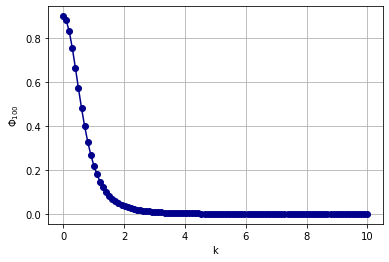

In [ ]:
a0=1.0
z=1.0
k=np.linspace(0.0,10,100)
y=2*2**0.5/np.pi*(z/a0)**(5/2)*(1/((z/a0)**2+k**2)**2)
plt.plot(k,y,'darkblue',marker='o')
plt.xlabel('k')
plt.ylabel(r'$\Phi _{100}$')
plt.grid()